<a href="https://colab.research.google.com/github/rajeshpahari/Deep-Learning/blob/main/ANN_Regression_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple Linear regression through ANN- with simple statistics

In [27]:
#Import Libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from IPython import display
display.set_matplotlib_formats('svg')


<ipython-input-27-e582c439f209>:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


We will create our dummey data

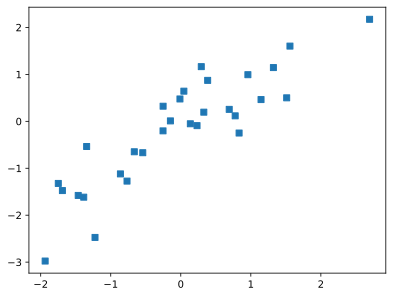

In [28]:
N=30
x=torch.randn(N,1)#
y=x+torch.randn(N,1)/2

plt.plot(x,y,'s')

Lets Build our Model

In [29]:
#Model
annreg=nn.Sequential(
    nn.Linear(1,1),# input layer 1
    nn.ReLU(), #Activation Layer
    nn.Linear(1,1)#output layer

)

annreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [30]:
#Learning rate
lr=.05

#Loss function
lossfun=nn.MSELoss() #meansquare error for regression


#Optimizer
optimizer=torch.optim.SGD(annreg.parameters(),lr=lr)


In [31]:
#Train the Model
epochs=500
losses=torch.zeros(epochs)


#Train
for epochi in range(epochs):

  #Forwardpass
  yhat=annreg(x)

  #compute loss
  loss=lossfun(yhat,y)

  #Store loss for each epoch
  losses[epochi]=loss

  #backprop

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()




0.2948848605155945

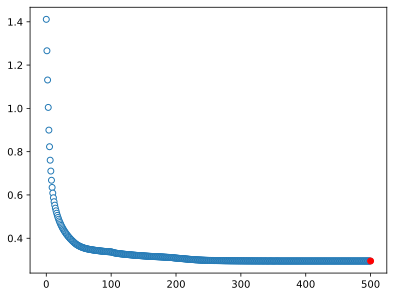

In [32]:
#Show the loss

#final forward pass
pred=annreg(x)

testloss=((pred-y)**2).mean()


plt.plot(losses.detach(),'o',markerfacecolor='w',lw=.1)
plt.plot(epochs,testloss.detach(),'ro')

testloss.item()


Text(0.5, 1.0, 'prediction data r=0.88')

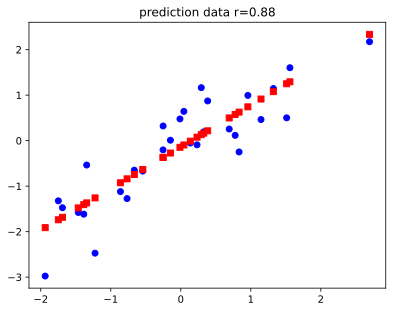

In [33]:
#Plot the data

plt.plot(x,y,'bo',label='Real data')
plt.plot(x,pred.detach(),'rs',label='Predicted Data')

plt.title(f'prediction data r={np.corrcoef(y.T,pred.detach().T)[0,1]:.2f}')